**Simon Silverstein**

# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

**The shape is $1\times 1$**

What is the *shape* of the thing we are taking the derivative with respect to?

**The shape is $n\times 1$**

What is the *shape* of the result of the expression?

**The result will be $n\times 1$**

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$


**Pf.**

\begin{align*}
LHS &= \frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} \\
&= \frac{\partial}{\partial \boldsymbol{x}} \left(\sum_ia_ix_i\right) \\
&= \boldsymbol{q}
\end{align*}

where we're calling that whole mess $\boldsymbol{q}$ to make it easier to index. The $j$ -th element of this vector is

\begin{align*}
q_j &= \frac{\partial}{\partial x_j} \left(\sum_ia_ix_i\right) \\
&= \sum_i \left(\frac{\partial}{\partial x_j}a_ix_i\right) \\
&= a_j
\end{align*}

since

$$
\frac{\partial}{\partial x_j}a_ix_i = \begin{cases}
    a_j & \text{if } j=i \\
    0 & \text{otherwise}.
\end{cases}
$$

$q_j=a_j$ implies that 

$$
\frac{\partial}{\partial \boldsymbol{x}} \left(\sum_ia_ix_i\right) = \boldsymbol{q} = \boldsymbol{a}^T = RHS
$$

and we're done.

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

**Pf.**

\begin{align*}
\frac{\partial}{\partial \boldsymbol{a}}\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a} &=
     \left(\frac{\partial}{\partial \boldsymbol{a}}\boldsymbol{a}^T\right)\boldsymbol{A}\boldsymbol{a}
     + \boldsymbol{a}^T\left(\frac{\partial}{\partial \boldsymbol{a}}\boldsymbol{A}\boldsymbol{a}\right) \\

&= \boldsymbol{A}\boldsymbol{a}
     + \boldsymbol{a}^T\boldsymbol{A} \\

&= \boldsymbol{a}^T\boldsymbol{A}^T+ \boldsymbol{a}^T\boldsymbol{A} \\

&= \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T)

\end{align*}


## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

**Setting the derivative to 0 ensures that you have a local minimum or maximum. Since the expression is a quantity squared, it must be a minimum and it must be global.**

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

$\boldsymbol{\theta} = \boldsymbol{X}^{-1}\boldsymbol{y}$

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

**Pf.**

\begin{align*}
LHS &= \frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} \\

&= \left(\frac{\partial}{\partial \boldsymbol{s}}  (\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})^T \right)(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})
    + (\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})^T\frac{\partial}{\partial \boldsymbol{s}}(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}) \\

&= \left(\frac{\partial}{\partial \boldsymbol{s}}  (\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}) \right)^T(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})
    - (\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})^T\boldsymbol{A} \\

&= -\boldsymbol{A}^T(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}) - (\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})^T\boldsymbol{A} \\

&= -(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})^T\boldsymbol{A} - (\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})^T\boldsymbol{A} \\

&= -2(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s})^T\boldsymbol{A} \\

&= RHS


\end{align*}

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = (\boldsymbol{X^T X})^{-1}\boldsymbol{X}^Ty
$$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [1]:
import numpy as np

In [2]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [3]:
X = np.array([
    np.ones_like(income),
    income,
    children
]).T
y = spending

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [4]:
def OLS_parameters(X, y):
    return np.linalg.inv(X.T@X)@X.T@y

beta = OLS_parameters(X, y)
beta

array([ 9.12808583,  0.5119025 , 14.60743095])

## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [5]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [6]:
def polynomial_features(x, p):
    orders = np.arange(p + 1)
    exp, base = np.meshgrid(orders, x)
    return base ** exp

X = polynomial_features(x, 5)
X[:4]

array([[   1.        ,   -3.        ,    9.        ,  -27.        ,
          81.        , -243.        ],
       [   1.        ,   -2.93939394,    8.64003673,  -25.3964716 ,
          74.65023471, -219.42644749],
       [   1.        ,   -2.87878788,    8.28741965,  -23.85772324,
          68.68132447, -197.71896439],
       [   1.        ,   -2.81818182,    7.94214876,  -22.38241923,
          63.07772693, -177.76450317]])

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [7]:
beta = OLS_parameters(X, y)
beta

array([ 0.93458487,  0.27464654, -0.02326439,  0.05342623, -0.0034652 ,
       -0.0087781 ])

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [9]:
beta_train = OLS_parameters(X_train, y_train)

train_predict = np.sum(X_train*beta_train, axis=1)
test_predict = np.sum(X_test*beta_train, axis=1)

MSE_train = np.sum((y_train - train_predict)**2) / len(y_train)
MSE_test = np.sum((y_test - test_predict)**2) / len(y_test)

print('MSE_train', MSE_train)
print('MSE_test', MSE_test)

MSE_train 0.01353050428996282
MSE_test 0.0158105333719111


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

In [10]:
import matplotlib.pyplot as plt

In [11]:
def train_to_order(x, y, p): # Function for fitting a pth degree polynomial
    X = polynomial_features(x, p)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    beta = OLS_parameters(X_train, y_train)

    train_predict = np.sum(X_train*beta, axis=1)
    test_predict = np.sum(X_test*beta, axis=1)

    MSE_train = np.sum((y_train - train_predict)**2) / len(y_train)
    MSE_test = np.sum((y_test - test_predict)**2) / len(y_test)

    return (MSE_train, MSE_test)

ps = np.arange(2,11)

MSE = np.array([train_to_order(x, y, p) for p in ps])

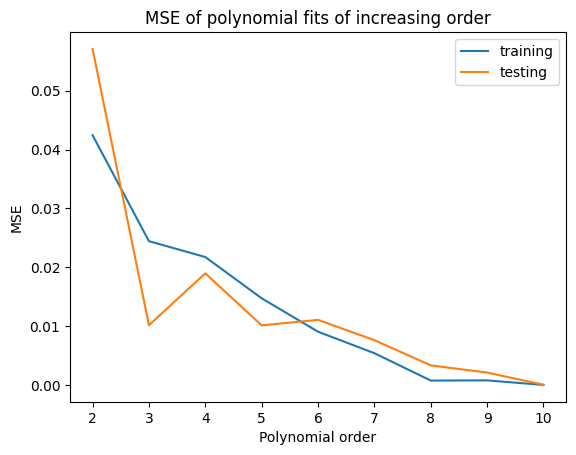

In [12]:
fig, ax = plt.subplots()
ax.plot(ps, MSE[:, 0], label='training')
ax.plot(ps, MSE[:, 1], label='testing')
ax.set_xlabel('Polynomial order')
ax.set_ylabel('MSE')
ax.set_title('MSE of polynomial fits of increasing order')
ax.legend()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

**From the above graph, we see two things - first, that MSE decreases with model complexity, and second, that it does so similarly for both the training and the testing data. This implies that our model generalizes well to data it hasn't seen.**

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
p = 7 # arbitrary

mine = polynomial_features(x, p)
theirs = PolynomialFeatures(p).fit_transform(np.reshape(x, (100, 1)))

assert np.allclose(mine, theirs)

**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [23]:
from sklearn.linear_model import LinearRegression

In [32]:
features = polynomial_features(x, p)

my_beta = OLS_parameters(features, y)
their_beta = LinearRegression(fit_intercept=False).fit(features, y).coef_

assert np.allclose(my_beta, their_beta)